In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (15.0, 15.0)

In [2]:
from matplotlib import rc
rc('font', size=18)
rc('lines', linewidth=2)

In [3]:
from numpy import loadtxt, arange, log, delete, array, ones, concatenate
from numpy.linalg import lstsq
from scipy.stats import f
from scipy.stats.mstats import normaltest
from pandas.stats.moments import ewma
from pandas import Series

In [4]:
from common import *

In [5]:
dataset = loadtxt('data.csv', skiprows=1, delimiter=',')
t = arange(dataset.shape[0])
y = dataset[:, 0]
xs = dataset[:, 1:].transpose()

In [6]:
y_without_anomalies = y.copy()
for anomaly_point in (2, 12, 4):
    y_without_anomalies[anomaly_point] = .5 * (
        y_without_anomalies[anomaly_point - 1] + y_without_anomalies[anomaly_point + 1])

In [7]:
Y = TimeSeries(y_without_anomalies)
XS = [TimeSeries(x) for x in xs]

In [8]:
coefficients = array([-3.32977205, 1.75338916, 15.59086665, 22.66879142])
# coefficients = array([-2.2973453536745487, 1.7593819364594978, 14.71896589822392, 21.34197979017393, -4.863977208663348])

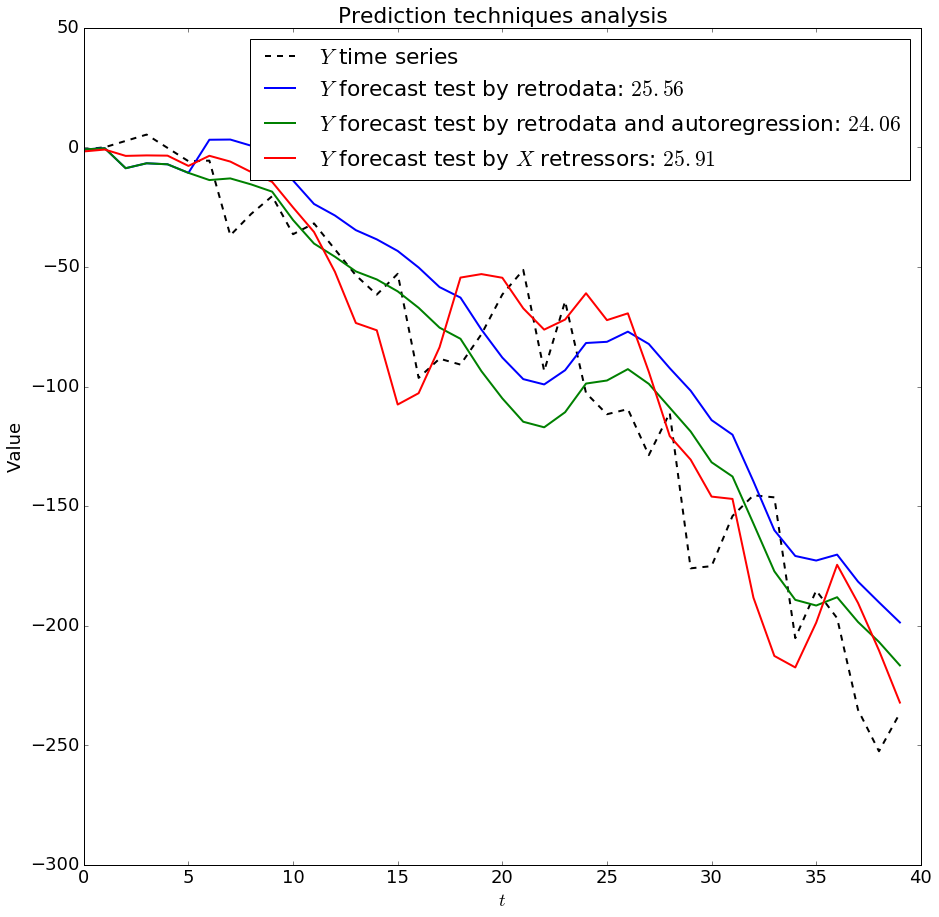

In [9]:
x_ = [ones(XS[0].forecast_test.size),
      XS[1].forecast_test * XS[5].forecast_test,
      XS[2].forecast_test * XS[4].forecast_test,
      XS[4].forecast_test * XS[5].forecast_test,
      # XS[3].forecast_test * XS[3].forecast_test
     ]
# y_estimate = coefficients.dot(regressors)
y_estimate = coefficients.dot(x_)

r_error = (y_without_anomalies - Y.trend_forecast_test[:-3]).std()
t_error = (y_without_anomalies - Y.forecast_test[:-3]).std()
x_error = (y_without_anomalies - y_estimate[:-3]).std()

plt.title('Prediction techniques analysis')

plt.plot(y_without_anomalies, 'k', label='$Y$ time series', linestyle='--')
plt.plot(Y.trend_forecast_test[:-3], 'b', label='$Y$ forecast test by retrodata: $%2.2f$'%r_error)
plt.plot(Y.forecast_test[:-3], 'g', label='$Y$ forecast test by retrodata and autoregression: $%2.2f$'%t_error)
plt.plot(y_estimate[:-3], 'r', label='$Y$ forecast test by $X$ retressors: $%2.2f$'%x_error)

plt.xlabel('$t$')
plt.ylabel('Value')

plt.legend()
plt.show()

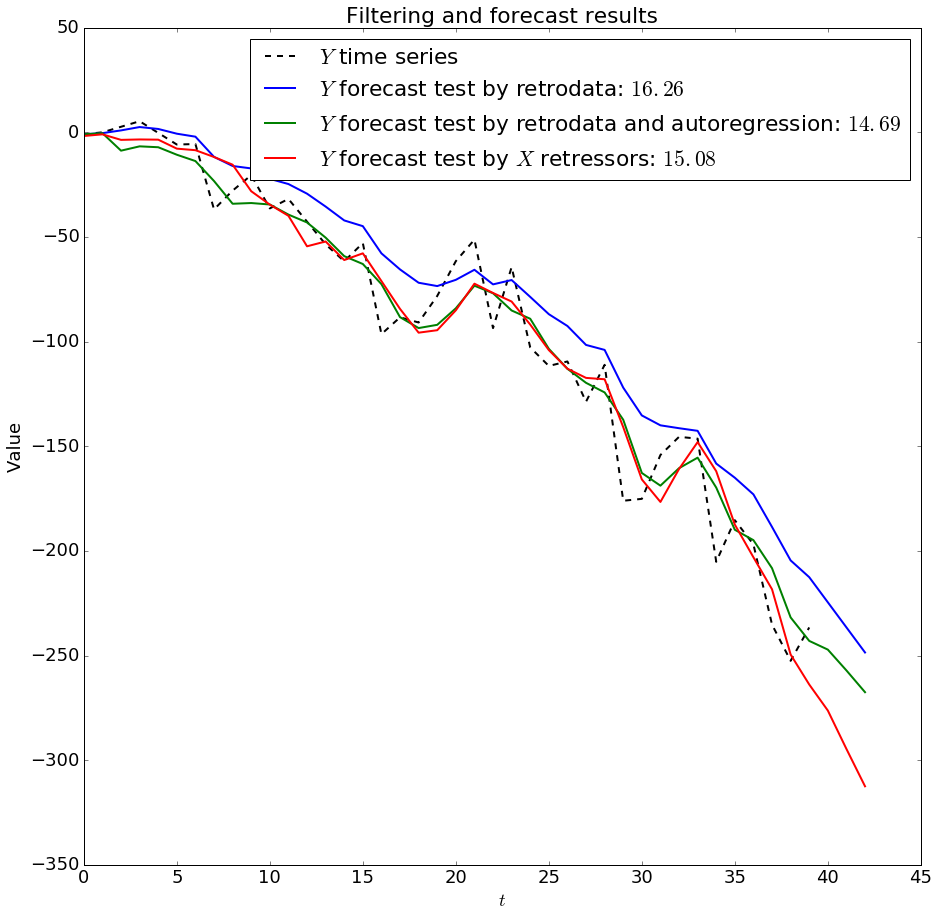

In [10]:
x_ = [ones(XS[0].data_forecasted.size),
      XS[1].data_forecasted * XS[5].data_forecasted,
      XS[2].data_forecasted * XS[4].data_forecasted,
      XS[4].data_forecasted * XS[5].data_forecasted,
      # XS[3].forecast_test * XS[3].forecast_test
     ]
# y_estimate = coefficients.dot(regressors)
y_estimate = coefficients.dot(x_)

r_error = (y_without_anomalies - Y.smoothed).std()
t_error = (y_without_anomalies - Y.data_estimate).std()
x_error = (y_without_anomalies - y_estimate[:-3]).std()

plt.title('Filtering and forecast results')

plt.plot(y_without_anomalies, 'k', label='$Y$ time series', linestyle='--')
plt.plot(Y.trend_forecasted, 'b', label='$Y$ forecast test by retrodata: $%2.2f$'%r_error)
plt.plot(Y.data_forecasted, 'g', label='$Y$ forecast test by retrodata and autoregression: $%2.2f$'%t_error)
plt.plot(y_estimate, 'r', label='$Y$ forecast test by $X$ retressors: $%2.2f$'%x_error)

plt.xlabel('$t$')
plt.ylabel('Value')

plt.legend()
plt.show()